In [8]:
%pylab inline
import biff


Populating the interactive namespace from numpy and matplotlib


In [154]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [174]:
def co_orbiting_sats(names):
    print('satellites co-orbiting around MW:')
    co_orb_satellites = [b'Hor1', b'Cra2', b'Car3', b'Ret2',
                         b'Dra1', b'Hyd1', b'Dra2', b'UMin1',
                         b'Fnx1', b'Leo1', b'Car1']

    index_name = []
    for i in range(len(co_orb_satellites)):
        if len(np.where(co_orb_satellites[i]==names)[0])>0:
            index_name.append(np.where(co_orb_satellites[i]==names)[0][0])
    print(index_name)
    print(names[index_name])
    return index_name


def counter_orbiting_sats(names):
    print('satellites counter-orbiting around MW:')
    counter_orb_satellites = [b'Leo4', b'Aqu2', b'CanVen2', b'Scu1', b'Boo3']

    index_name = []
    for i in range(len(counter_orb_satellites)):
        if len(np.where(counter_orb_satellites[i]==names)[0])>0:
            print(counter_orb_satellites[i])
            index_name.append(np.where(counter_orb_satellites[i]==names)[0][0])

    print(names[index_name])
    return index_name

In [183]:
data = genfromtxt('../data/MW_satellites.dat', dtype=None)
vx = data['f7']
vy = data['f9']
vz = data['f11']
x = data['f13']
y = data['f15']
z = data['f17']
name = data['f0']

v = np.sqrt(vx**2 + vy**2 + vz**2)

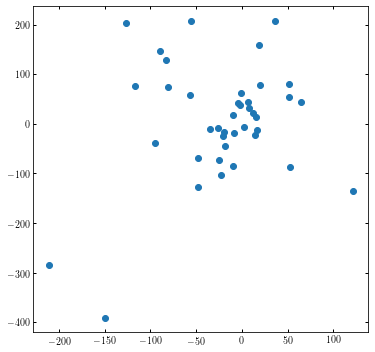

In [71]:
figsize(6,6)
scatter(y, z)

In [7]:
coeff_c = np.loadtxt('../../SCF_tools/PCA/MWLMC5_coeff_20_20_100M_b1.txt')
S = coeff_c[:,0]
T = coeff_c[:,1]

S_matrix = np.zeros((21, 21, 21))
T_matrix = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix[n][l][m] = S[counter]
            T_matrix[n][l][m] = T[counter]
            counter +=1

In [9]:
## Reading coefficients 
coeff_lmc = np.loadtxt('./LMC/coeff_rand_40lmc5_b1_1E6_1.txt')
S_lmc = coeff_lmc[:,0]
T_lmc = coeff_lmc[:,1]

S_lmc_1e6 = np.zeros((41, 21, 21))
T_lmc_1e6 = np.zeros((41, 21, 21))


counter = 0
for n in range(41):
    for l in range(21):
        for m in range(0, l+1):
            S_lmc_1e6[n][l][m] = S_lmc[counter]
            T_lmc_1e6[n][l][m] = T_lmc[counter]
            counter +=1

In [10]:
xlmc_com = 1
ylmc_com = -41
zlmc_com = -28


In [200]:
pot_ratio_all = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        pot_ratio_all[i][j] = biff.potential(np.array([[0-xlmc_com], [Y_grid[0][i]-ylmc_com], [Z_grid[j,0]-ylmc_com]]).T,
                                      S_lmc_1e6, T_lmc_1e6, M=11.41*1E6,r_s=10, G=1) \
                            / biff.potential(np.array([[0], [Y_grid[0][i]], [Z_grid[j,0]]]).T, S_matrix, T_matrix, M=1, r_s=40.85, G=1)

In [11]:
y_grid = np.arange(-300, 300, 5.5)
z_grid = np.arange(-300, 300, 5.5)
Y_grid, Z_grid = meshgrid(y_grid, z_grid)

In [35]:
xyz = np.ascontiguousarray(np.array([np.zeros(len(Y_grid.flatten()))-xlmc_com,
                                     Y_grid.flatten()-ylmc_com, Z_grid.flatten()-zlmc_com]).T)

In [36]:
a_all = biff.potential(xyz, S_lmc_1e6, T_lmc_1e6, M=11.41*1E6,r_s=10, G=1)

(-100, 100)

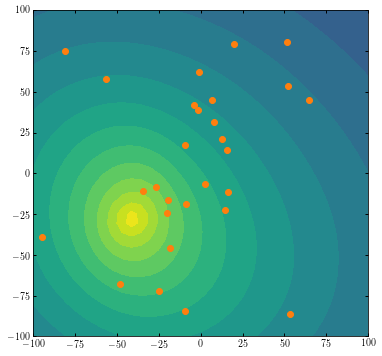

In [49]:
figsize(6,6)
contourf(Y_grid, Z_grid, np.log10(np.abs(a_all)).reshape(110, 110), 20)

scatter(y, z, c='C1')

xlim(-100, 100)
ylim(-100, 100)



In [138]:
index_corb = co_orbiting_sats((name))

satellites co-orbiting around MW:
[b'Hor1' b'Cra2' b'Car3' b'Ret2' b'Dra1' b'Hyd1' b'Dra2' b'UMin1' b'Fnx1'
 b'Leo1' b'Car1']


(-200, 200)

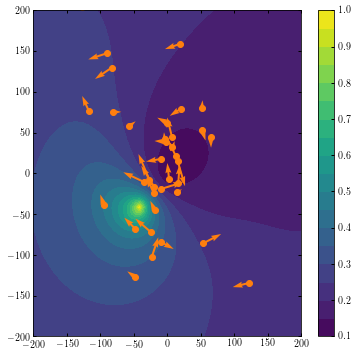

In [99]:
contourf(Y_grid, Z_grid, (pot_ratio_all).reshape(110, 110), 20)

colorbar()

scatter(y, z, c='C1')
quiver(y, z, vy, vz, color='C1')

xlim(-200, 200)
ylim(-200, 200)

In [194]:
index_xcut = np.where(np.abs(x-xlmc_com)<30)[0]

In [195]:
index_corb = co_orbiting_sats((name[index_xcut]))

satellites co-orbiting around MW:
[16, 14, 12, 23, 1, 17, 15, 4, 0]
[b'Hor1' b'Cra2' b'Car3' b'Ret2' b'Dra1' b'Hyd1' b'Dra2' b'UMin1' b'Car1']


In [196]:
index_count = counter_orbiting_sats((name[index_xcut]))

satellites counter-orbiting around MW:
b'Leo4'
b'Aqu2'
b'CanVen2'
b'Scu1'
b'Boo3'
[b'Leo4' b'Aqu2' b'CanVen2' b'Scu1' b'Boo3']


In [197]:
name[index_xcut]

array([b'Car1', b'Dra1', b'Sag1', b'Scu1', b'UMin1', b'Aqu2', b'Boo1',
       b'Boo2', b'Boo3', b'CanVen1', b'CanVen2', b'Car2', b'Car3',
       b'ComBer1', b'Cra2', b'Dra2', b'Hor1', b'Hyd1', b'Leo4', b'Leo5',
       b'Phx1', b'Phx2', b'Pis2', b'Ret2', b'Seg1', b'Tri2', b'Tuc2',
       b'Tuc3', b'Wil1'],
      dtype='|S7')

In [228]:
name[index_xcut][index_count]

array([b'Leo4', b'Aqu2', b'CanVen2', b'Scu1', b'Boo3'],
      dtype='|S7')

In [230]:
print(y[index_xcut][index_count], z[index_xcut][index_count])

[-82.7531534  53.1622646  18.5823877  -9.588164    6.8204502] [ 129.8197984  -85.9802658  158.6672388  -84.1223015   45.0456528]


Text(0,0.5,'z[kpc]')

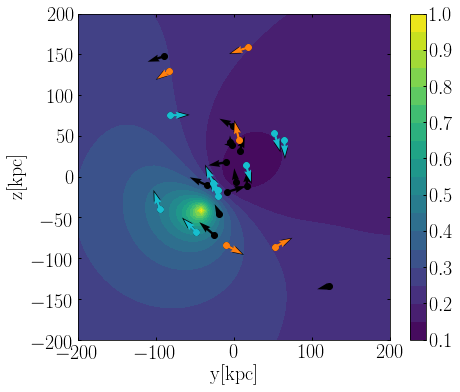

In [201]:
figure(figsize=(7,6))
contourf(Y_grid, Z_grid, (pot_ratio_all).reshape(110, 110), 20)

colorbar()

scatter(y[index_xcut], z[index_xcut], c='k')
quiver(y[index_xcut], z[index_xcut], vy[index_xcut]/v[index_xcut], vz[index_xcut]/v[index_xcut], color='k')

scatter(y[index_xcut][index_corb], z[index_xcut][index_corb], c='C9')
quiver(y[index_xcut][index_corb], z[index_xcut][index_corb], vy[index_xcut][index_corb]/v[index_xcut][index_corb]
       , vz[index_xcut][index_corb]/v[index_xcut][index_corb], color='C9')


scatter(y[index_xcut][index_count], z[index_xcut][index_count], c='C1')
quiver(y[index_xcut][index_count], z[index_xcut][index_count], 
       vy[index_xcut][index_count]/v[index_xcut][index_count], vz[index_xcut][index_count]/v[index_xcut][index_count], color='C1')


xlim(-200, 200)
ylim(-200, 200)

xlabel('y[kpc]')
ylabel('z[kpc]')

In [241]:
z[index_xcut][z[index_xcut]<-50]

array([ -84.1223015,  -85.9802658,  -67.9136581, -390.9067841,
        -71.8542822, -134.4885949])

In [244]:
y[index_xcut][z[index_xcut]<-50]

array([  -9.588164 ,   53.1622646,  -48.007952 , -150.1706841,
        -24.8084569,  121.4868813])

In [245]:
name[index_xcut][z[index_xcut]<-50]

array([b'Scu1', b'Aqu2', b'Hor1', b'Phx1', b'Phx2', b'Pis2'],
      dtype='|S7')

In [208]:
index = np.where(((pot_ratio_all).reshape(110, 110)) > 0.6)

In [232]:
sculptur = np.where(name==b'Scu1')

In [233]:
x_scu1 = x[sculptur]
y_scu1 = y[sculptur]
z_scu1 = z[sculptur]
vx_scu1 = vx[sculptur]
vy_scu1 = vy[sculptur]
vz_scu1 = vz[sculptur]

In [236]:
dist = np.sqrt(x_scu1**2 + y_scu1**2 + z_scu1**2)

array([ 84.82748942])

In [222]:
min_y = Y_grid[index]

-52.5

In [227]:
index[0][3]

45

In [226]:
Y_grid[index[0],index[1]]

array([-52.5, -47. , -41.5, -58. , -52.5, -47. , -41.5, -36. , -63.5,
       -58. , -52.5, -47. , -41.5, -36. , -30.5, -63.5, -58. , -52.5,
       -47. , -41.5, -36. , -30.5, -58. , -52.5, -47. , -41.5, -36. ,
       -52.5, -47. , -41.5])

TypeError: Input z must be a 2D array.

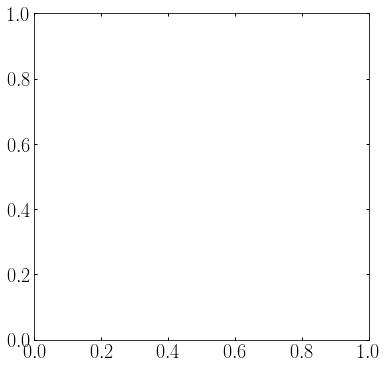

In [206]:
contourf(Y_grid[index], Z_grid[index], (pot_ratio_all).reshape(110, 110)[index], 20)
